In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# aproximacion inicial (1.1) Gauss Jacobi 

In [31]:
%autoreload 2
from src import gauss_jacobi
#E1   
A = [[2, 10],[3, 2 ]]
b = [16,11]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_jacobi(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)


[01-24 11:50:36][INFO] i= 0 x: [[1. 1.]]
[01-24 11:50:36][INFO] i= 1 x: [[3. 4.]]
[01-24 11:50:36][INFO] i= 2 x: [[-12.   1.]]
[01-24 11:50:36][INFO] i= 3 x: [[ 3.  23.5]]
[01-24 11:50:36][INFO] i= 4 x: [[-109.5    1. ]]
[01-24 11:50:36][INFO] i= 5 x: [[  3.   169.75]]
[01-24 11:50:36][INFO] i= 6 x: [[-840.75    1.  ]]
[01-24 11:50:36][INFO] i= 7 x: [[   3.    1266.625]]
[01-24 11:50:36][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-24 11:50:36][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]


(array([[3.0000000e+00],
        [9.4931875e+03]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [4.]]),
  array([[-12.],
         [  1.]]),
  array([[ 3. ],
         [23.5]]),
  array([[-109.5],
         [   1. ]]),
  array([[  3.  ],
         [169.75]]),
  array([[-840.75],
         [   1.  ]]),
  array([[   3.   ],
         [1266.625]]),
  array([[-6.325125e+03],
         [ 1.000000e+00]]),
  array([[3.0000000e+00],
         [9.4931875e+03]])])

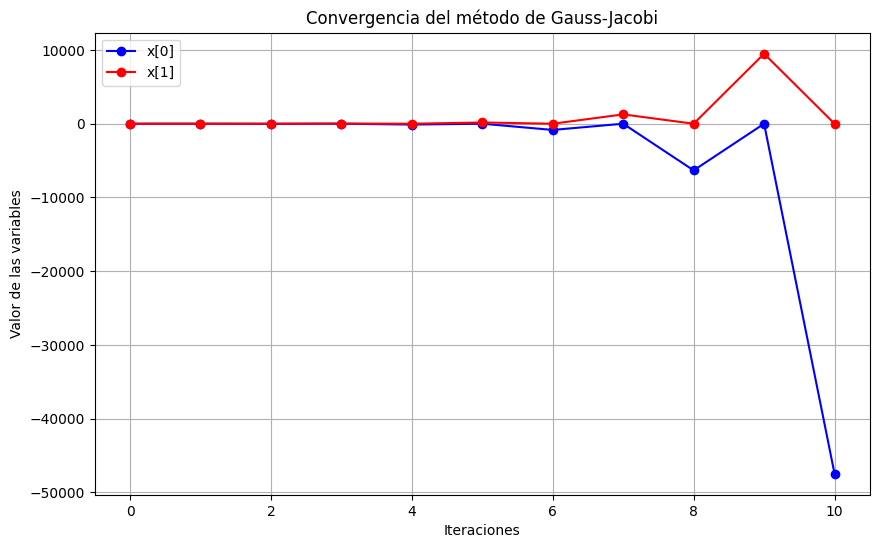

In [34]:

import numpy as np
import matplotlib.pyplot as plt
# grafico de diverja
def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(A)
    x = np.array(x0, dtype=float)
    iteraciones = [x.copy()]  
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i][i]
        
        iteraciones.append(x_new.copy())
        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    
    return iteraciones

A = [[2, 10], [3, 2]]
b = [16, 11]
x0 = (1, 1)  
tol = 0.1
max_iter = 10

iteraciones = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

iteraciones_array = np.array(iteraciones)

plt.figure(figsize=(10, 6))
plt.plot(iteraciones_array[:, 0], label='x[0]', marker='o', linestyle='-', color='b')
plt.plot(iteraciones_array[:, 1], label='x[1]', marker='o', linestyle='-', color='r')
plt.title('Convergencia del método de Gauss-Jacobi')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de las variables')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
%autoreload 2
from src import gauss_jacobi
#E1
A = [[3, 2 ],[2, 10]]
b = [11,16]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_jacobi(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)




[01-24 11:42:10][INFO] i= 0 x: [[1. 1.]]
[01-24 11:42:10][INFO] i= 1 x: [[3.  1.4]]
[01-24 11:42:10][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-24 11:42:10][INFO] i= 3 x: [[3.         1.05333333]]


(array([[2.96444444],
        [1.        ]]),
 [array([[1.],
         [1.]]),
  array([[3. ],
         [1.4]]),
  array([[2.73333333],
         [1.        ]]),
  array([[3.        ],
         [1.05333333]])])

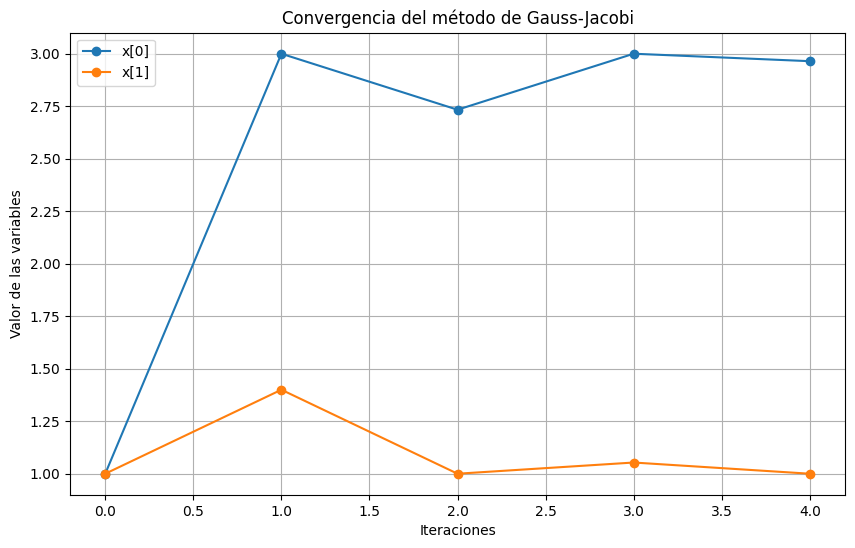

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#grafico que converja
def gauss_jacobi(A, b, x0, tol, max_iter):
  
    n = len(A)
    x = np.array(x0, dtype=float)
    iteraciones = [x.copy()]  
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i][i]
        
        iteraciones.append(x_new.copy())
        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    
    return iteraciones


iteraciones = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

iteraciones_array = np.array(iteraciones)

plt.figure(figsize=(10, 6))
plt.plot(iteraciones_array[:, 0], label='x[0]', marker='o')
plt.plot(iteraciones_array[:, 1], label='x[1]', marker='o')
plt.title('Convergencia del método de Gauss-Jacobi')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de las variables')
plt.legend()
plt.grid(True)
plt.show()

# aproximacion inicial (1.1) Gauss Seidel

In [35]:
%autoreload 2
from src import gauss_seidel

#E1
A = [[3, 2 ],[2, 10]]
b = [11,16]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_seidel(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)

[01-24 11:01:40][INFO] i= 0 x: [[1. 1.]]
[01-24 11:01:40][INFO] i= 1 x: [[3. 1.]]


(array([[3.],
        [1.]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [1.]])])

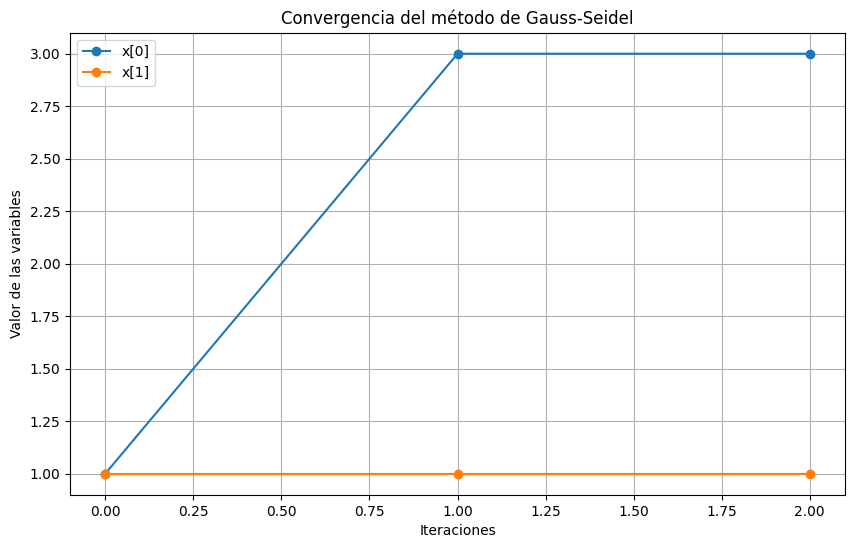

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# parámetros
A = [[3, 2], [2, 10]]
b = [11, 16]
x0 = (1, 1)
tol = 0.1
max_iter = 10

def gauss_seidel(A, b, x0, tol, max_iter):
    
    n = len(A)
    x = np.array(x0, dtype=float)
    iteraciones = [x.copy()] 
    
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i][i]
        
        iteraciones.append(x_new.copy())
        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    
    return iteraciones


iteraciones = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

iteraciones_array = np.array(iteraciones)

plt.figure(figsize=(10, 6))
plt.plot(iteraciones_array[:, 0], label='x[0]', marker='o')
plt.plot(iteraciones_array[:, 1], label='x[1]', marker='o')
plt.title('Convergencia del método de Gauss-Seidel')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de las variables')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
%autoreload 2
from src import gauss_seidel
# E2
A =[[2, 10], [3, 2 ]]
b = [16,11]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_seidel(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)

[01-24 11:01:42][INFO] i= 0 x: [[1. 1.]]
[01-24 11:01:42][INFO] i= 1 x: [[3. 1.]]


(array([[3.],
        [1.]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [1.]])])

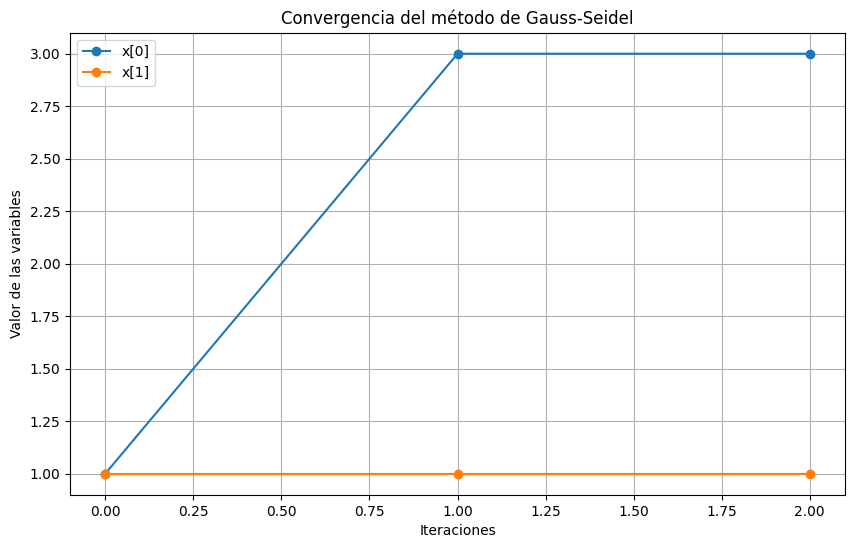

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# parámetros
A =[[2, 10], [3, 2 ]]
b = [16,11]

x0 = (1,1)
tol = 0.1
max_iter = 10

def gauss_seidel(A, b, x0, tol, max_iter):
    
    n = len(A)
    x = np.array(x0, dtype=float)
    iteraciones = [x.copy()] 
    
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i][i]
        
        iteraciones.append(x_new.copy())
        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    
    return iteraciones


iteraciones = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

# Convertir las iteraciones a un array de NumPy para graficar
iteraciones_array = np.array(iteraciones)

plt.figure(figsize=(10, 6))
plt.plot(iteraciones_array[:, 0], label='x[0]', marker='o')
plt.plot(iteraciones_array[:, 1], label='x[1]', marker='o')
plt.title('Convergencia del método de Gauss-Seidel')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de las variables')
plt.legend()
plt.grid(True)
plt.show()

# aproximacion inicial (5,-2) Gauss Jacobi 

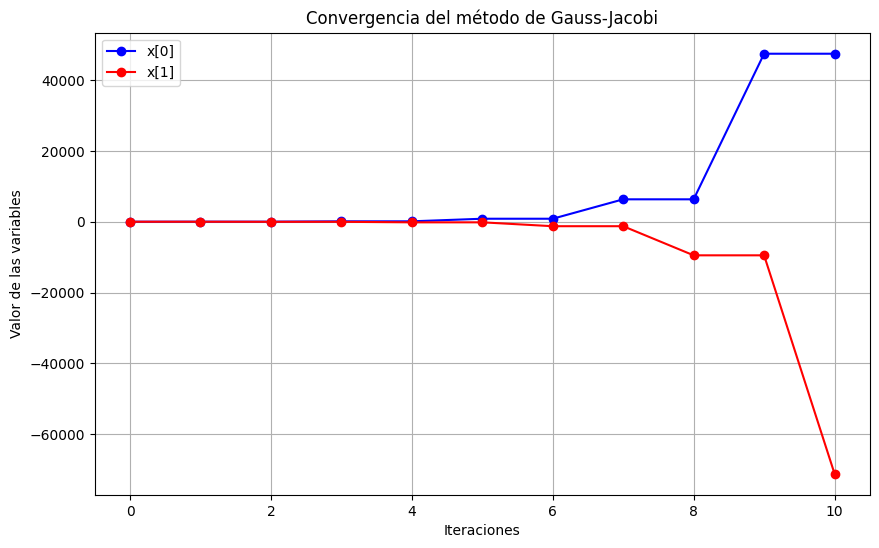

In [40]:

import numpy as np
import matplotlib.pyplot as plt
# grafico de diverja
def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(A)
    x = np.array(x0, dtype=float)
    iteraciones = [x.copy()]  
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i][i]
        
        iteraciones.append(x_new.copy())
        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    
    return iteraciones

A = [[2, 10], [3, 2]]
b = [16, 11]
x0 = (5, -2)  
tol = 0.1
max_iter = 10

iteraciones = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

iteraciones_array = np.array(iteraciones)

plt.figure(figsize=(10, 6))
plt.plot(iteraciones_array[:, 0], label='x[0]', marker='o', linestyle='-', color='b')
plt.plot(iteraciones_array[:, 1], label='x[1]', marker='o', linestyle='-', color='r')
plt.title('Convergencia del método de Gauss-Jacobi')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de las variables')
plt.legend()
plt.grid(True)
plt.show()
